<h1 align="center" style="color:red"> 
    <b>
        Error Surface
    </b>
</h1>

In [12]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Enable visualization of special figures
%matplotlib notebook

In [13]:
# Reseting random seed to generate always the same random values
np.random.seed(1234)

In [14]:
# Number of examples
N = 1000

# Attributes (Nx1)
x1 = np.random.randn(N,1)
x2 = np.random.randn(N,1)

# White Gaussian Noise (Nx1)
w = np.random.randn(N,1)

# True function (Nx1)
y = x1 + x2

# Noisy function (Nx1)
y_noisy = x1 + x2 + w

<IPython.core.display.Javascript object>


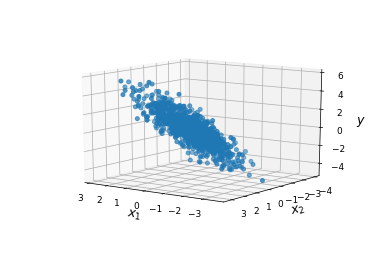

Text(0.5,0,'$y$')

In [15]:
# Ploting values
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y_noisy, label='Função observável')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)

In [16]:
def calculateErrorSurface(y, x1, x2):
    # Generatedata points to plot the error surface 
    N = 200
    # Generate N equally spaced values for a1 and a2. Range: -2 to 4
    a1 = np.linspace(-2.0,4.0,N)
    a2 = np.linspace(-2.0,4.0,N)
    
    # Create a grid with pair values for a1 and a2
    A1, A2 = np.meshgrid(a1, a2)
    
    # Pontos para realizar a plotagem da superfície da função de custo
    J = np.zeros((N, N))
    
    # Calculate error value for each pair of a1 and a2
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A1[iter1][iter2]*x1+A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/len(y))*np.sum(np.square(y-yhat))
            
    return J, A1, A2

In [17]:
# Attribute array without bias (do not have)
X = np.c_[x1,x2]

# Normal equation
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Calculating ŷ values based on estimated model, multiplying attributes matrix by the coefficients
yhat = X.dot(a_opt)

J_opt = (1.0/N)*np.sum(np.power((y_noisy-yhat),2))

<h2 align="center"> 
    <b>
        Plot the Error Surface
    </b>
</h2>

<IPython.core.display.Javascript object>


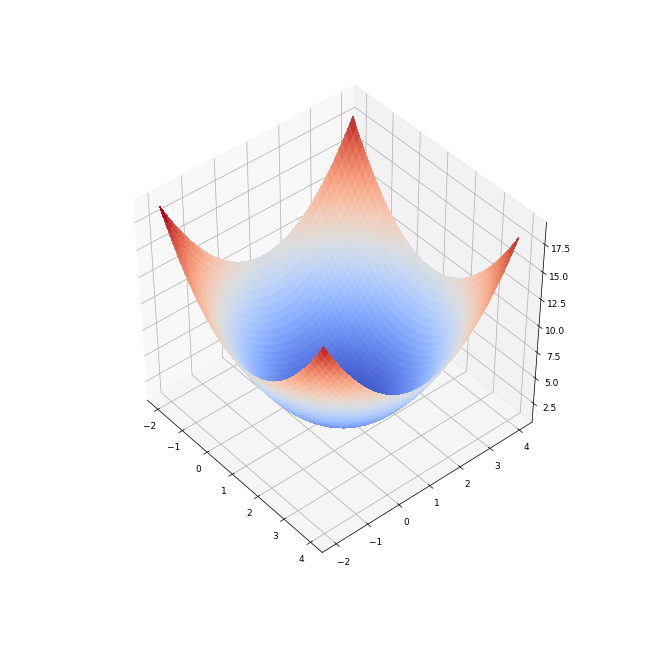

TypeError: object of type 'numpy.float64' has no len()

In [32]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plotting cost-function
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap = cm.coolwarm, linewidth=0, antialiased=False)

ax.plot(a_opt[0,0], a_opt[1,0], J_opt, c='r', marker='*', markersize=10)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Error Surface')
ax.view_init(20,45)
plt.savefig("img/erro_surface_example.png", dpi=600)
plt.show()

<h2 align="center"> 
    <b>
        Cost-function Contour
    </b>
</h2>

<IPython.core.display.Javascript object>


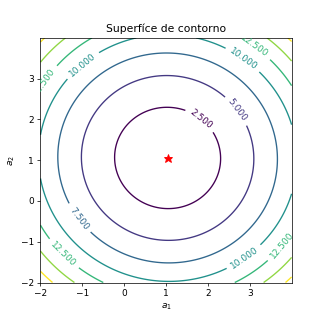

In [33]:
# Plot the surface view in curve lines

fig = plt.figure(figsize=(5,5))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.title('Superfíce de contorno')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=10)

plt.xticks(np.arange(-2, 4, step=1.0))
plt.yticks(np.arange(-2, 4, step=1.0))

plt.savefig("contour_surface_example2.png", dpi=600)

plt.show()

<h2 align="center"> 
    <b>
        Plot the observable function with the plan found with the normal equation method
    </b>
</h2>

<IPython.core.display.Javascript object>


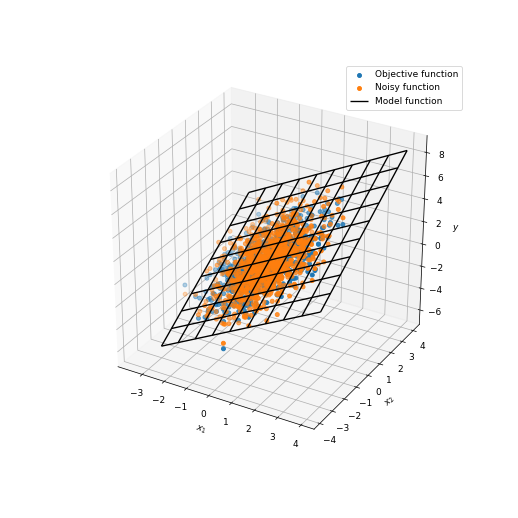

In [36]:
fig = plt.figure(figsize=(8,8))
plt.subplot(projection='3d')
ax = fig.gca()

N = 10
x1_ = np.linspace(-3.0, 4.0, N)
x2_ = np.linspace(-3.0, 4.0, N)
X1, X2 = np.meshgrid(x1_, x2_)
Y = a_opt[0]*X1 + a_opt[1]*X2

ax.scatter(x1, x2, y, label='Objective function')
ax.scatter(x1, x2, y_noisy, label='Noisy function')
ax.plot_wireframe(X1, X2, Y, color="black", label='Model function')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.show()

<h2 align="center"> 
    <b>
        Analysis with different weights for each attribute
    </b>
</h2>

<center>
    <img src="img/pesosDistintos.png" alt="Drawing" style="width: 750px;height: 430px"/>
</center>